##Linear Regreesion for house price prediction

What we will do:
1. Linear regression(with normal equation and iterative optimization)
2. Polynomial regression
3. Regularized regression models-ridge and lasso

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import loguniform
from scipy.stats import uniform

from sklearn.datasets import fetch_california_housing
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline


##Common set up

In [ ]:
np.random.seed(306)

Let's use `ShuffleSplit` as cv with 10splits and 20% examples set aside as test examples

In [ ]:
cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

##Data Loading and splitting
We will load the data and split it into three parts-train,dev and test .Train+Dev will be used for cross validation and test will be used for everything and trained models

In [ ]:
#fetch dataset
features,labels=fetch_california_housing(as_frame=True,return_X_y=True)
#train-test split
com_train_features,test_features,com_train_labels,test_labels=train_test_split(features,labels,random_state=42)

#train-->train+dev split
train_features,dev_features,train_labels,dev_labels=train_test_split(com_train_features,com_train_labels,random_state=42)

##Linear regression with normal equation

In [ ]:
##linear regression will use normal equation here
lin_reg_pipeline=Pipeline([("feature_scaling",StandardScaler()),
                           ("lin_reg",LinearRegression())])

lin_reg_cv_results=cross_validate(lin_reg_pipeline,
                                  com_train_features,
                                  com_train_labels,
                                  cv=cv,
                                  scoring="neg_mean_absolute_error",
                                  return_train_score=True,
                                  return_estimator=True)
lin_reg_train_error=-1*lin_reg_cv_results['train_score']
lin_reg_test_error=-1*lin_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{lin_reg_train_error.mean():.3f}+/-{lin_reg_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{lin_reg_test_error.mean():.3f}+/-{lin_reg_train_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.530+/-0.002
Mean absolute error of linear regression model on the test set:
0.527+/-0.002


##Linear regression with SGD

In [ ]:
sgd_reg_pipeline=Pipeline([("feature_scaling",StandardScaler()),
                           ("sgd_reg",SGDRegressor(
                               max_iter=np.ceil(
                                   1e6/com_train_features.shape[0]),
                               early_stopping=True,
                               eta0=1e-4,
                               learning_rate='constant',
                               tol=1e-5,
                               validation_fraction=0.1,
                               n_iter_no_change=5,
                               average=10,
                               random_state=42))])

sgd_reg_cv_results=cross_validate(sgd_reg_pipeline,
                                  com_train_features,
                                  com_train_labels,
                                  cv=cv,
                                  scoring="neg_mean_absolute_error",
                                  return_train_score=True,
                                  return_estimator=True)

sgd_train_error=-1*sgd_reg_cv_results['train_score']
sgd_test_error=+1*sgd_reg_cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{sgd_train_error.mean():.3f}+/-{sgd_train_error.std():.3f}")
print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{sgd_test_error.mean():.3f}+/-{sgd_train_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.564+/-0.023
Mean absolute error of linear regression model on the test set:
-0.561+/-0.023


##Polynomial regression

In [ ]:
poly_reg_pipeline=Pipeline([("poly",PolynomialFeatures(degree=2)),
                           ("feature_scaling",StandardScaler()),
                           ("lin_reg",LinearRegression())])

poly_reg_cv_results=cross_validate(poly_reg_pipeline,
                                  com_train_features,
                                  com_train_labels,
                                  cv=cv,
                                  scoring="neg_mean_absolute_error",
                                  return_train_score=True,
                                  return_estimator=True)
poly_reg_train_error=-1*poly_reg_cv_results['train_score']
poly_reg_test_error=-1*poly_reg_cv_results['test_score']

print(f"Mean absolute error of polynomial regression model on the train set:\n"
      f"{poly_reg_train_error.mean():.3f}+/-{poly_reg_train_error.std():.3f}")
print(f"Mean absolute error of polynomial regression model on the test set:\n"
      f"{poly_reg_test_error.mean():.3f}+/-{poly_reg_train_error.std():.3f}")

Mean absolute error of polynomial regression model on the train set:
0.461+/-0.003
Mean absolute error of polynomial regression model on the test set:
0.485+/-0.003


Instead of using all polynomial feature we use only interaction feature terms in polynomial model and train the lineat regression model.

In [ ]:
poly_reg_pipeline=Pipeline([("poly",PolynomialFeatures(degree=2,interaction_only=True)),
                           ("feature_scaling",StandardScaler()),
                           ("lin_reg",LinearRegression())])

poly_reg_cv_results=cross_validate(poly_reg_pipeline,
                                  com_train_features,
                                  com_train_labels,
                                  cv=cv,
                                  scoring="neg_mean_absolute_error",
                                  return_train_score=True,
                                  return_estimator=True)
poly_reg_train_error=-1*poly_reg_cv_results['train_score']
poly_reg_test_error=-1*poly_reg_cv_results['test_score']

print(f"Mean absolute error of polynomial regression model on the train set:\n"
      f"{poly_reg_train_error.mean():.3f}+/-{poly_reg_train_error.std():.3f}")
print(f"Mean absolute error of polynomial regression model on the test set:\n"
      f"{poly_reg_test_error.mean():.3f}+/-{poly_reg_train_error.std():.3f}")

Mean absolute error of polynomial regression model on the train set:
0.478+/-0.003
Mean absolute error of polynomial regression model on the test set:
0.497+/-0.003


Figuring out which degree suited best for the regression probelm

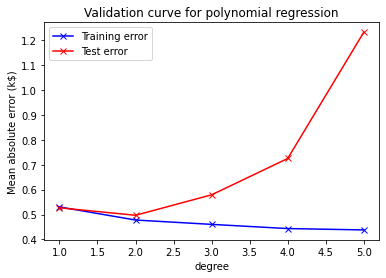

In [ ]:
degree=[1,2,3,4,5]
train_scores,test_scores=validation_curve(
    poly_reg_pipeline,com_train_features,com_train_labels,param_name="poly__degree",
    param_range=degree,cv=cv,scoring="neg_mean_absolute_error",
    n_jobs=2)

train_errors,test_errors=-train_scores,-test_scores
plt.plot(degree,train_errors.mean(axis=1),'b-x',label="Training error")
plt.plot(degree,test_errors.mean(axis=1),'r-x',label="Test error")
plt.legend()

plt.xlabel("degree")
plt.ylabel("Mean absolute error (k$)")
_=plt.title("Validation curve for polynomial regression")

##Ridge Regression

The polynomial models have a tendency to overfit-if we use higher order polynomial features.We will use Ridge regression-which penalize for excessive model complexity int the polynomial regression by adding a regularization term.

In [ ]:
#alpha is regularization rate
ridge_reg_pipeline=Pipeline([("poly",PolynomialFeatures(degree=2)),
                           ("feature_scaling",StandardScaler()),
                           ("ridge",Ridge(alpha=0.5))])

redge_reg_cv_results=cross_validate(ridge_reg_pipeline,
                                  com_train_features,
                                  com_train_labels,
                                  cv=cv,
                                  scoring="neg_mean_absolute_error",
                                  return_train_score=True,
                                  return_estimator=True)
redge_reg_train_error=-1*redge_reg_cv_results['train_score']
redge_reg_test_error=-1*redge_reg_cv_results['test_score']

print(f"Mean absolute error of ridge regression model on the train set:\n"
      f"{redge_reg_train_error.mean():.3f}+/-{redge_reg_train_error.std():.3f}")
print(f"Mean absolute error of ridge regression model on the test set:\n"
      f"{redge_reg_test_error.mean():.3f}+/-{redge_reg_train_error.std():.3f}")

Mean absolute error of ridge regression model on the train set:
0.481+/-0.003
Mean absolute error of ridge regression model on the test set:
0.487+/-0.003


##HPT(hyper tuning of parameters) for ridge regularization rate

In [ ]:
alpha_list=np.logspace(-4,0,num=20)
ridge_reg_pipeline=Pipeline([("poly",PolynomialFeatures(degree=2)),
                           ("feature_scaling",StandardScaler()),
                           ("ridge_cv",RidgeCV(alphas=alpha_list,
                                               cv=cv,
                                               scoring="neg_mean_absolute_error"))])
ridge_reg_cv_results=ridge_reg_pipeline.fit(com_train_features,com_train_labels)

In [ ]:
print("The score with the best alpha is:",
      f"{ridge_reg_cv_results[-1].best_score_:.3f}")
print("The error with the best alpha is:",
      f"{-ridge_reg_cv_results[-1].best_score_:.3f}")

The score with the best alpha is: -0.473
The error with the best alpha is: 0.473


In [ ]:
print("The error with the best alpha is:",-ridge_reg_cv_results[-1].alpha_)

The error with the best alpha is: -0.007847599703514606


##Do RIdge with cross validation yourself

##Ridge HTP with `GridSearchCV`

In [ ]:
ridge_grid_pipeline=Pipeline([("poly",PolynomialFeatures(degree=2)),
                           ("feature_scaling",StandardScaler()),
                           ("ridge",Ridge())])

param_grid={'poly__degree':(1,2,3),
            'ridge__alpha':np.logspace(-4,0,num=20)}
ridge_grid_search=GridSearchCV(ridge_grid_pipeline,
                               param_grid=param_grid,
                               n_jobs=2,
                               cv=cv,
                               scoring="neg_mean_absolute_error",
                               return_train_score=True)
ridge_grid_search.fit(com_train_features,com_train_labels)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('feature_scaling', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=2,
             param_grid={'poly__degree': (1, 2, 3),
                         'ridge__alpha': array([1.00000000e-04, 1.62377674e-04, 2.63665090e-04, 4.28133240e-04,
       6.95192796e-04, 1.12883789e-03, 1.83298071e-03, 2.97635144e-03,
       4.83293024e-03, 7.84759970e-03, 1.27427499e-02, 2.06913808e-02,
       3.35981829e-02, 5.45559478e-02, 8.85866790e-02, 1.43844989e-01,
       2.33572147e-01, 3.79269019e-01, 6.15848211e-01, 1.00000000e+00])},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [ ]:
ridge_grid_search.best_index_

29

In [ ]:
mean_train_error=-1*ridge_grid_search.cv_results_['mean_train_score'][ridge_grid_search.best_index_]
mean_test_error=-1*ridge_grid_search.cv_results_['mean_test_score'][ridge_grid_search.best_index_]
std_train_error=-1*ridge_grid_search.cv_results_['std_train_score'][ridge_grid_search.best_index_]
std_test_error=-1*ridge_grid_search.cv_results_['std_test_score'][ridge_grid_search.best_index_]

print(f"Best Mean absolute error of polynomial ridge regression model on the train set:\n"
      f"{mean_train_error:.3f}+/-{std_train_error:.3f}")
print(f"Mean absolute error of polynomial ridge regression model on the test set:\n"
      f"{mean_test_error:.3f}+/-{std_test_error:.3f}")

Best Mean absolute error of polynomial ridge regression model on the train set:
0.463+/--0.004
Mean absolute error of polynomial ridge regression model on the test set:
0.474+/--0.015


In [ ]:
print(ridge_grid_search.best_score_) #score
print(-ridge_grid_search.best_score_) #error


-0.4738651176991914
0.4738651176991914


In [ ]:
ridge_grid_search.best_params_

{'poly__degree': 2, 'ridge__alpha': 0.007847599703514606}

##Lasso Regression

##SGD:Regularization and HPT

##RandomizedSearchCV

##Performance on the test set

###Baseline

In [ ]:
baseline_model_median=DummyRegressor(strategy='median')
baseline_model_median.fit(train_features,train_labels)
mean_absolute_percentage_error(test_labels,baseline_model_median.predict(test_features))

0.5348927548151625

###Linear regression with normal equation

In [ ]:
mean_absolute_percentage_error(test_labels,lin_reg_cv_results['estimator'][0].predict(test_features))

0.32120472175482906

In [ ]:
# mean_absolute_percentage_error(test_labels,poly_sgd_random_search.best_estimator_.predict(test_features))

###Polynomial regression

In [ ]:
poly_reg_pipeline.fit(com_train_features,com_train_labels)
mean_absolute_percentage_error(test_labels,poly_reg_pipeline.predict(test_features))

0.28199759082657244

###Ridge Regression

In [ ]:
mean_absolute_percentage_error(test_labels,ridge_grid_search.best_estimator_.predict(test_features))

0.27110336451421413